<class 'pandas.core.frame.DataFrame'>
Index: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10233 non-null  object        
 1   Date_of_Journey  10338 non-null  datetime64[ns]
 2   Source           10473 non-null  object        
 3   Destination      10313 non-null  object        
 4   Route            10404 non-null  object        
 5   Dep_Time         10400 non-null  object        
 6   Arrival_Time     10466 non-null  object        
 7   Duration         10446 non-null  float64       
 8   Total_Stops      10448 non-null  object        
 9   Additional_Info  10071 non-null  object        
 10  Price            10044 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 999.4+ KB
None


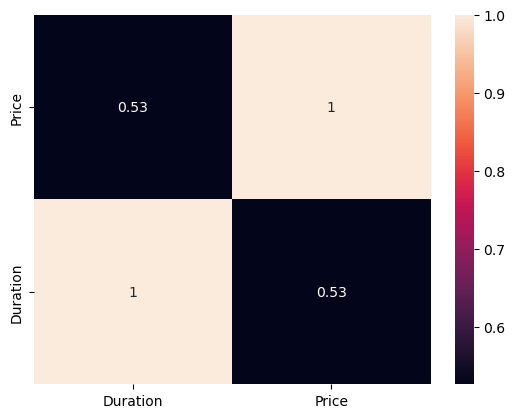

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

planes = pd.read_csv('Airlines_unclean.csv', index_col = 0, parse_dates=['Date_of_Journey','Dep_Time','Arrival_Time'], date_format = "%d/%m/%Y" )
# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")
# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)
print(planes.info())
ax = sns.heatmap(planes.corr(numeric_only = True), annot=True)
ax.set_ylim([0,2])
plt.show()


In [60]:
#remove Nan values
threshold = len(planes) * 0.05
print(threshold)

# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)
print(planes.isna().sum())
#planes = planes.drop(columns = ['Additional_Info’])
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()
print(airline_prices)
print('============================================')
# Convert to a dictionary
prices_dict = airline_prices.to_dict()
print(prices_dict)
print('============================================')

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())


533.0
Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64
Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}
Airline              0
D

In [61]:
divorce = pd.read_csv("divorce.csv", parse_dates=['divorce_date', 'dob_man', 'dob_woman'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object


In [62]:
# Convert the marriage_date column of the divorce DataFrame to DateTime values. Check the data types.
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


In [63]:
# Define a column called marriage_year, which contains just the year portion of the marriage_date column.
divorce["marriage_year"] = divorce["marriage_date"].dt.year

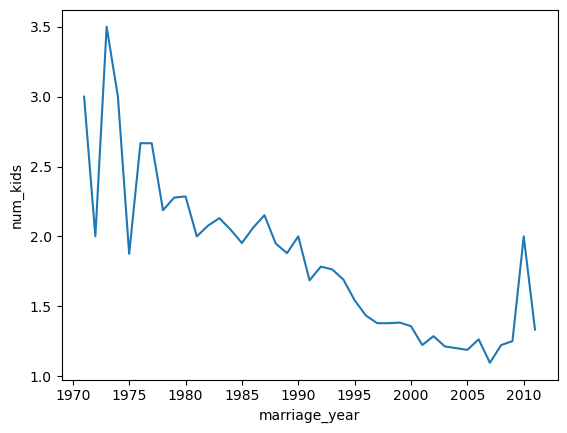

In [64]:
# Create a line plot showing the average number of kids a couple had during their marriage, arranged by the year that the couple got married.
avg_kids = divorce.groupby("marriage_year")["num_kids"].mean()
sns.lineplot(data=avg_kids)
plt.show()

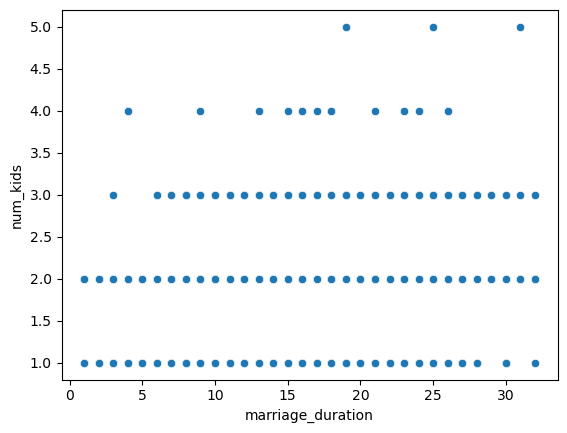

In [65]:
# Create a scatterplot showing marriage_duration on the x-axis and num_kids on the y-axis.
sns.scatterplot(data=divorce, x="marriage_duration", y="num_kids")
plt.show()

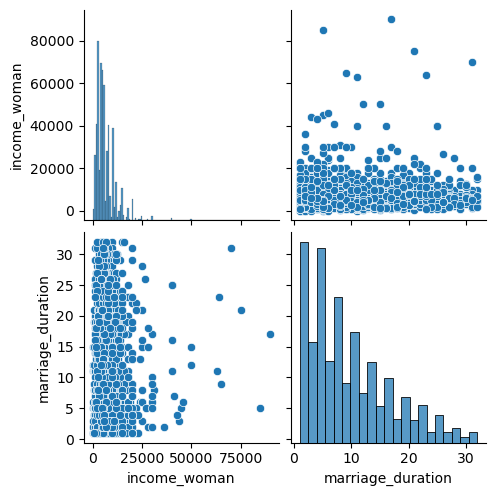

In [66]:
# Create a pairplot to visualize the relationships between income_woman and marriage_duration in the divorce DataFrame.
sns.pairplot(data=divorce, vars=["income_woman", "marriage_duration"])
plt.show()

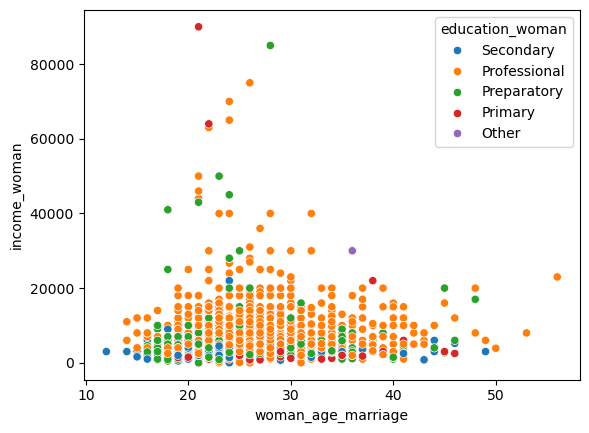

In [67]:
# Create a scatter plot that shows woman_age_marriage on the x-axis and income_woman on the y-axis; each data point should be colored based on the woman's level of education, represented by education_woman.
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year
sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman")
plt.show()

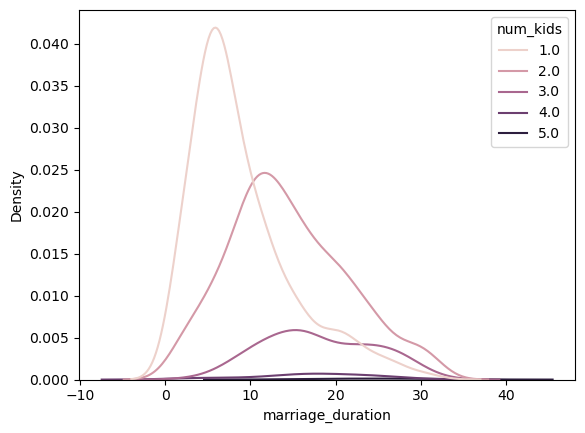

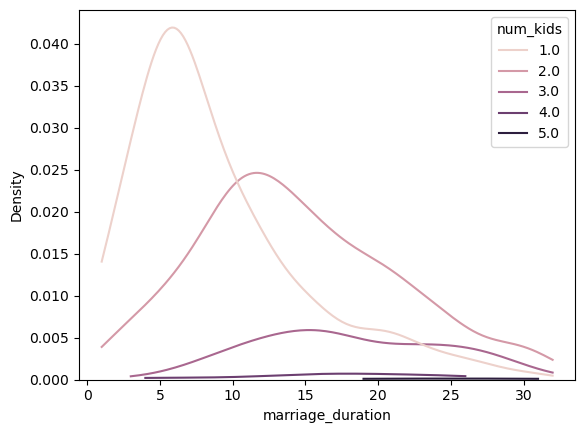

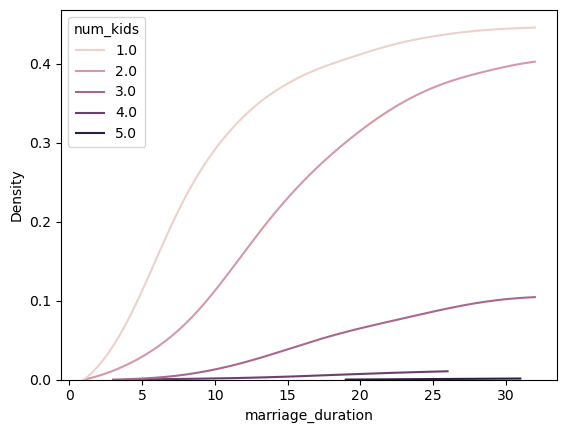

In [68]:
# Create a KDE plot showing marriage_duration on the x-axis, colored by num_kids.
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids")
plt.show()

# Update the KDE plot so that marriage duration cannot be smoothed past the extreme data points.
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

# Update the code for the KDE plot from the previous step to show a cumulative distribution function for each number of children a couple has.
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()

In [69]:
# Load Salary_Rupee_USD.csv to salaries with index_col = 0
salaries = pd.read_csv("Salary_Rupee_USD.csv", index_col=0)

# Print the relative frequency of the "Job_Category" column from salaries DataFrame.
salaries["Job_Category"].value_counts(normalize=True)

Job_Category
Data Science        0.277641
Data Engineering    0.272727
Data Analytics      0.226044
Machine Learning    0.120393
Other               0.068796
Managerial          0.034398
Name: proportion, dtype: float64

In [70]:
# Perform cross-tabulation, setting "Company_Size" as the index, and the columns to classes in "Experience".
pd.crosstab(salaries["Company_Size"], salaries["Experience"])

Experience,EN,EX,MI,SE
Company_Size,,,,
L,24,7,49,44
M,25,9,58,136
S,18,1,21,15


In [71]:
# Perform cross-tabulate "Job_Category" and classes of "Company_Size" as column names.
pd.crosstab(salaries["Job_Category"], salaries["Company_Size"])

Company_Size,L,M,S
Job_Category,,,
Data Analytics,23,61,8
Data Engineering,28,72,11
Data Science,38,59,16
Machine Learning,17,19,13
Managerial,5,8,1
Other,13,9,6


In [72]:
# Update pd.crosstab() to return the mean "Salary_USD" values.
pd.crosstab(salaries["Job_Category"], salaries["Company_Size"], values=salaries["Salary_USD"], aggfunc="mean")

Company_Size,L,M,S
Job_Category,,,
Data Analytics,112851.749217,95912.685246,53741.877000
Data Engineering,118939.035000,121287.060500,86927.136000
Data Science,96489.520105,116044.455864,62241.749250
Machine Learning,140779.491529,100794.236842,78812.586462
Managerial,190551.448800,150713.628000,31484.700000
Other,92873.911385,89750.578667,69871.248000


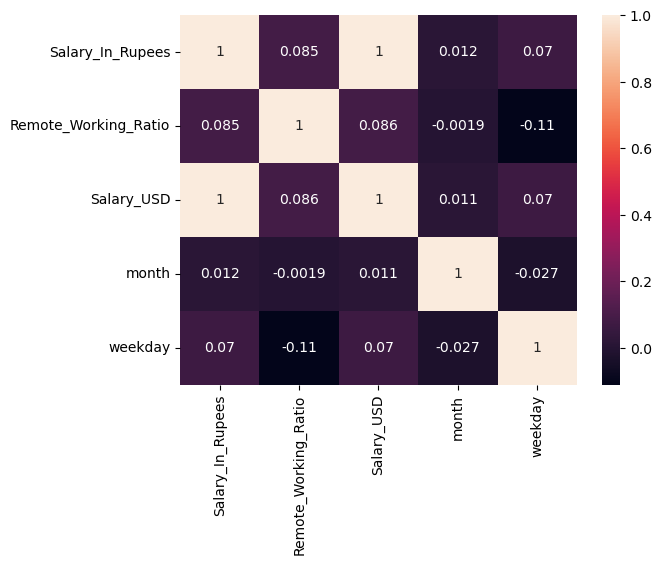

In [73]:
# Load the Salaries_with_date_of_response.csv to salaries, with index_col = 0 and parse_date = ['date_of_response']
salaries = pd.read_csv("Salaries_with_date_of_response.csv", index_col=0, parse_dates=["date_of_response"], date_format="%d/%m/%Y")

# Extract the month from "date_of_response", storing it as a column called "month".
salaries["month"] = salaries["date_of_response"].dt.month

# Create the "weekday" column, containing the weekday that the participants completed the survey.
salaries["weekday"] = salaries["date_of_response"].dt.weekday

# Plot a heat map, including the Pearson correlation coefficient scores.
sns.heatmap(salaries.corr(numeric_only=True), annot=True)
plt.show()

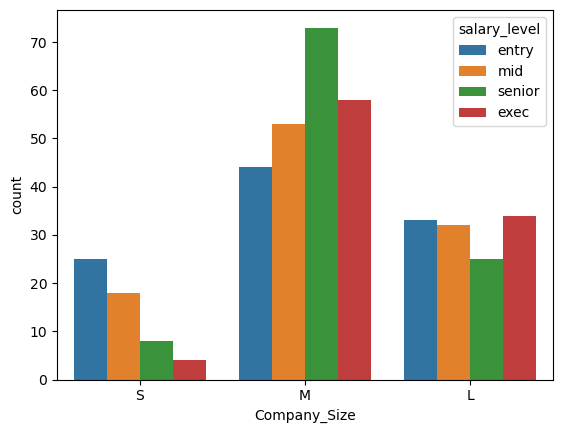

In [74]:
# Find the 25th percentile of "Salary_USD"
percentile_25 = salaries["Salary_USD"].quantile(0.25)

# Store the median of "Salary_USD" as salaries_median
salaries_median = salaries["Salary_USD"].median()

# Get the 75th percentile of salaries
percentile_75 = salaries["Salary_USD"].quantile(0.75)

# Create salary_labels, a list containing "entry", "mid", "senior", and "exec"
salary_labels = ["entry", "mid", "senior", "exec"]

# Finish salary_ranges, adding the 25th percentile, median, 75th percentile, and largest value from "Salary_USD"
salary_ranges = [0, percentile_25, salaries_median, percentile_75, salaries["Salary_USD"].max()]

# Split "Salary_USD" based on the labels and ranges you've created
salaries["salary_level"] = pd.cut(salaries["Salary_USD"], bins=salary_ranges, labels=salary_labels)

# Use sns.countplot() to visualize the count of "Company_Size", factoring salary level labels
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

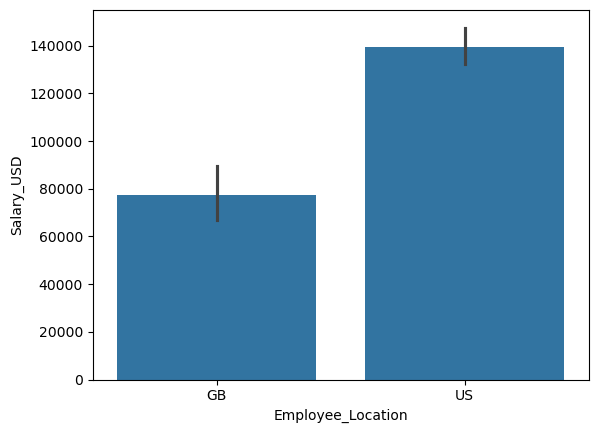

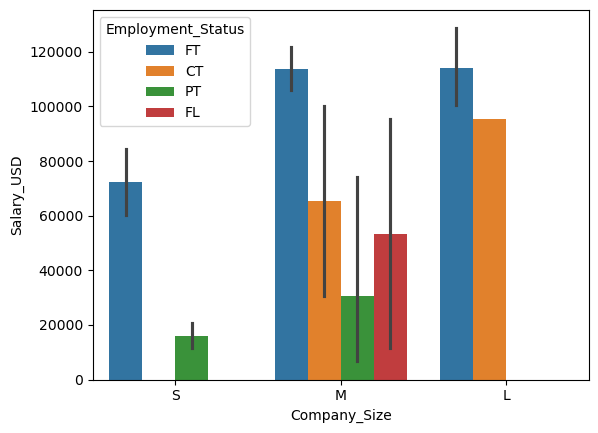

In [75]:
# Filter salaries where "Employee_Location" is "US" or "GB", saving as usa_and_gb.
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Use usa_and_gb to create a barplot visualizing "Salary_USD" against "Employee_Location".
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

# Create a bar plot of salary versus company size, factoring in employment status (hue)
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()